<h1><center>Natural Language Processing</center></h1>

## What is NLP

- Pandas and Numpy are great with tabular data or spreadsheets. However, as human beings generally communicate in words and sentences, not in the form of tables. Much information that humans speak or write is unstructured. 
- The goal of natural language processing (NLP) is to make computers understand the unstructured text and retrieve meaningful pieces of information from it. 
- Natural language Processing (NLP) is a subfield of artificial intelligence, in which its depth involves the interactions between computers and humans. 
- Examples and applications of NLP:

    - Machine Translation.
    - Speech Recognition.
    - Sentiment Analysis.
    - Chatbot.
    - Spell Checking.
    - Spam Detection.
    - ...

## Standard Language handling 

- remove noises such as urls, account ids, etc.
- Tokenizing
    - By tokenizing, you can conveniently split up text by word or by sentence. 
    - It’s your first step in turning unstructured data into structured data, which is easier to analyze
- Remove punctuation marks (not recommended for social media text)
    - isalpha( ) isnumeric string method to see if each word is made of letters or numbers
- Removing stopwords
    - Stop words are words that you want to ignore, such as: 'in', 'is', and 'an' 
    - they don’t add a lot of meaning to a text in and of themselves
- Stemming and Lemmatizing
    - Stemming is a text processing task in which you reduce words to their root, which is the core part of a word. 
        - For example, the words “helping” and “helper” share the root “help.” 

In [1]:
! pip install nltk   #you can use this to install nltk, if it is not yet installed

In [2]:
import nltk    # most commonly used package for NLP

In [3]:
a_string = """It's an awesome course :)! I love it, I will be sharing this with my 100 friends and classmates. 
Do you have other awesome Savvy'Pro courses like R, SAS, excel or SQL? https://savvypro.ca"""

### Remove Noise

URL links starts with http or https, with no space in it. So we would like to remove anything that 
- starts with "http"
- there is no space
    - for example: https://www.bilibili.com/video/BV1rB4y1v76E?spm_id_from=333.851.b_7265636f6d6d656e64.2

to do this, we need to understand 
### Python Regular Expression

A RegEx, or Regular Expression, is a sequence of characters that forms a search pattern. 

Python has a built-in package called **re**, which can be used to work with Regular Expressions. The re module offers a set of functions that allows us to search a string for a match: 

- findall	Returns a list containing all matches
- search	Returns a Match object if there is a match anywhere in the string
- split	Returns a list where the string has been split at each match
- sub	Replaces one or many matches with a string

The following website helps us to define a "pattern"
https://www.w3schools.com/python/python_regex.asp

- [] search for a set of characters, for example, [a-z]: single small letter
- \+ to indicate multiple such pattern
- \s search for "space"
- \S search for "non-space"

In [5]:
import re

# example 1: we want to replace "sunny" with "rainy"
# parameter 1: the word/pattern you would like to replace 要换啥？
# parameter 2: the word you would like to replace with 替换成啥？
txt = "I love sunny days in NYC sunny sunny yeah"

# example 2: to mask the phone number
txt = "my cell Phone number: 647-552-5526"

# example 3: to mask the email account id
txt = "my email: MayIhaveyournumber.123@gmail.com"

# example 4: to remove the url link
a_string


I love rainy days in NYC rainy rainy yeah
xx xxxx xxxxx xxxxxx: xxx-xxx-xxxx


["It's",
 'an',
 'awesome',
 'course',
 ':)!',
 'I',
 'love',
 'it,',
 'I',
 'will',
 'be',
 'sharing',
 'this',
 'with',
 'my',
 '100',
 'friends',
 'and',
 'classmates.',
 'Do',
 'you',
 'have',
 'other',
 'awesome',
 "Savvy'Pro",
 'courses',
 'like',
 'R,',
 'SAS,',
 'excel',
 'or',
 'SQL?',
 'https://savvypro.ca']

### Tokenizing: splitting into words and count

In [6]:
# split the string into sentences or words
# remember to convert everything to lower case
from nltk.tokenize import word_tokenize

sentences = nltk.sent_tokenize(a_string.lower())
words = nltk.word_tokenize(a_string.lower())
print(words)
print(sentences)

# more useful tokenizer for social media corpus: it treats :) as one word
from nltk.tokenize import TweetTokenizer
social_tokenizer = TweetTokenizer()
social_tokenizer.tokenize(a_string.lower())

['it', "'s", 'an', 'awesome', 'course', ':', ')', '!', 'i', 'love', 'it', ',', 'i', 'will', 'be', 'sharing', 'this', 'with', 'my', '100', 'friends', 'and', 'classmates', '.', 'do', 'you', 'have', 'other', 'awesome', "savvy'pro", 'courses', 'like', 'r', ',', 'sas', ',', 'excel', 'or', 'sql', '?', 'https', ':', '//savvypro.ca']
["it's an awesome course :)!", 'i love it, i will be sharing this with my 100 friends and classmates.', "do you have other awesome savvy'pro courses like r, sas, excel or sql?", 'https://savvypro.ca']


["it's",
 'an',
 'awesome',
 'course',
 ':)',
 '!',
 'i',
 'love',
 'it',
 ',',
 'i',
 'will',
 'be',
 'sharing',
 'this',
 'with',
 'my',
 '100',
 'friends',
 'and',
 'classmates',
 '.',
 'do',
 'you',
 'have',
 'other',
 'awesome',
 "savvy'pro",
 'courses',
 'like',
 'r',
 ',',
 'sas',
 ',',
 'excel',
 'or',
 'sql',
 '?',
 'https://savvypro.ca']

### The difference with split() method? 

- word_tokenize separate out the punctuation marks
- word_tokenize convert everything to lower case
- word_tokenize split "it's" into two words because it recognize it
    - however, it won't split "savvy'pro" 
    - split() does not split either of them 


In [9]:
# count the frequency of each word
# do it with pandas
import pandas as pd
pd.DataFrame(words).value_counts()

,                3
i                2
awesome          2
it               2
:                2
like             1
love             1
my               1
or               1
other            1
r                1
!                1
https            1
savvy'pro        1
sharing          1
sql              1
this             1
will             1
with             1
sas              1
friends          1
have             1
's               1
excel            1
do               1
courses          1
course           1
classmates       1
be               1
and              1
an               1
?                1
100              1
//savvypro.ca    1
.                1
)                1
you              1
dtype: int64

,                3
i                2
awesome          2
it               2
:                2
like             1
love             1
my               1
or               1
other            1
r                1
!                1
https            1
savvy'pro        1
sharing          1
sql              1
this             1
will             1
with             1
sas              1
friends          1
have             1
's               1
excel            1
do               1
courses          1
course           1
classmates       1
be               1
and              1
an               1
?                1
100              1
//savvypro.ca    1
.                1
)                1
you              1
dtype: int64

### removing punctuation marks: isalpha() and isnumeric() method

In [32]:
words_no_punc = []
for i in words:
    if i.isalpha() or i.isnumeric():
        words_no_punc.append(i.lower())

        
# in context such as social media and messages, certain punctuations are actually meaningful
# for example :) :( 
# think twice when you would like to remove them
words_no_punc


# try using list comprehension: newlist = [expression for item in iterable if condition == True]



['it',
 'an',
 'awesome',
 'course',
 'i',
 'love',
 'it',
 'i',
 'will',
 'be',
 'sharing',
 'this',
 'with',
 'my',
 '100',
 'friends',
 'and',
 'classmates',
 'do',
 'you',
 'have',
 'other',
 'awesome',
 'courses',
 'like',
 'r',
 'sas',
 'excel',
 'or',
 'sql',
 'https']

### Filtering Stop Words
Stop words are words that you want to ignore, so you filter them out of your text when you’re processing it. Very common words like 'in', 'is', and 'an' are often used as stop words since they don’t add a lot of meaning to a text in and of themselves.

In [27]:
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
print(stop_words)
len(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

179

In [10]:
print(words)

meaningful_words = []

# try using list comprehension: newlist = [expression for item in iterable if condition == True]


['it', "'s", 'an', 'awesome', 'course', ':', ')', '!', 'i', 'love', 'it', ',', 'i', 'will', 'be', 'sharing', 'this', 'with', 'my', '100', 'friends', 'and', 'classmates', '.', 'do', 'you', 'have', 'other', 'awesome', "savvy'pro", 'courses', 'like', 'r', ',', 'sas', ',', 'excel', 'or', 'sql', '?', 'https', ':', '//savvypro.ca']


### Stemming and Lemmatizing

Stemming is a text processing task in which you reduce words to their root, which is the core part of a word. 
- For example, the words “helping” and “helper” share the root “help.” 
- NLTK has more than one stemmer, Porter stemmer is the one that most commonly used for English

Like stemming, lemmatizing reduces words to their core meaning, but it will give you a complete English word that makes sense on its own instead of just a fragment of a word like 'cours'.

sometimes it makes mistakes: for example, SAS -> SA

In [23]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

print(stemmer.stem("awesome"))
print(lemmatizer.lemmatize("awesome"))
a = ["study",'studies','studying','studied','sas']

a_stemmed = [stemmer.stem(i) for i in a]
a_stemmed

awesom
awesome


['studi', 'studi', 'studi', 'studi', 'sa']

In [24]:
# try rewrite use List Comprehension by doing both lemmatizing and filting stop words
words 


['it',
 "'s",
 'an',
 'awesome',
 'course',
 ':',
 ')',
 '!',
 'i',
 'love',
 'it',
 ',',
 'i',
 'will',
 'be',
 'sharing',
 'this',
 'with',
 'my',
 '100',
 'friends',
 'and',
 'classmates',
 '.',
 'do',
 'you',
 'have',
 'other',
 'awesome',
 "savvy'pro",
 'courses',
 'like',
 'r',
 ',',
 'sas',
 ',',
 'excel',
 'or',
 'sql',
 '?',
 'https',
 ':',
 '//savvypro.ca']

## Let's get started -- Sentiment Analysis Using Sci-kit Learn package

One of the most popular projects in the industry. Every customer facing industry (retail, telecom, finance, etc.) is interested in identifying their customers’ sentiment, whether they think positive or negative about them.

- Step 0: preparation - clean the corpus: remove noise, tokenize, filter stop words and lemmatize...
- Step 1: we need to feed python a sample to tell it what is positive and what is negative
- Step 2: we should build a model in python so that python learns what is positive and what is negative (train)
- Step 3: we can use the model to judge a new sentence whether it is positive or negative (test)

### Step 0: Preparation

In [22]:
tweets_csv = pd.read_csv('/Users/sjiang1009/OneDrive - officepro449/SavvyPro/Python/Python实战班/data/tweets.csv')
tweets_csv

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [31]:

# put all tweets to a long list
x = tweets_csv.tweet.tolist()

# for each tweet: 
i = x[10]   
# remove "@xxx" and urls and convert to lower case - the outputs are still sentance
j = re.sub("(@\S+)|(http\S+)|(\n)" ," ",i).lower()
# tokenize - split sentance into list of words
i_words = social_tokenizer.tokenize(j)

# filter stop words and lemmatizing - use list comprehension to generate cleaned list of words
i_cleaned = [  lemmatizer.lemmatize(w)  for w in i_words if w not in stop_words ]
i_cleaned


['"',
 'keeks',
 'bitch',
 'curve',
 'everyone',
 '"',
 'lol',
 'walked',
 'conversation',
 'like',
 '.',
 'smh']

In [33]:
def clean(x):
    i = re.sub("(@\S+)|(http\S+)|(\n)" ," ",x).lower()
    i_words = social_tokenizer.tokenize(i)
    i_cleaned = [lemmatizer.lemmatize(w)  for w in i_words if w not in stop_words]
    return(i_cleaned)

cleaned_x = [clean(comment) for comment in x]
y = (tweets_csv['class'] == 1)
y.value_counts()

cleaned_x

[['!',
  '!',
  '!',
  'rt',
  'woman',
  'complain',
  'cleaning',
  'house',
  '.',
  '&',
  'man',
  'always',
  'take',
  'trash',
  '...'],
 ['!',
  '!',
  '!',
  'rt',
  'boy',
  'dat',
  'cold',
  '...',
  'tyga',
  'dwn',
  'bad',
  'cuffin',
  'dat',
  'hoe',
  '1st',
  'place',
  '!',
  '!'],
 ['!',
  '!',
  '!',
  'rt',
  'dawg',
  '!',
  '!',
  '!',
  'rt',
  'ever',
  'fuck',
  'bitch',
  'start',
  'cry',
  '?',
  'confused',
  'shit'],
 ['!', '!', '!', 'rt', 'look', 'like', 'tranny'],
 ['!',
  '!',
  '!',
  'rt',
  'shit',
  'hear',
  'might',
  'true',
  'might',
  'faker',
  'bitch',
  'told',
  'ya',
  '\ue011'],
 ['!',
  '!',
  '!',
  '"',
  'shit',
  'blow',
  '..',
  'claim',
  'faithful',
  'somebody',
  'still',
  'fucking',
  'hoe',
  '!',
  '😂',
  '😂',
  '😂',
  '"'],
 ['!',
  '!',
  '!',
  '"',
  'sit',
  'hate',
  'another',
  'bitch',
  '..',
  'got',
  'much',
  'shit',
  'going',
  '!',
  '"'],
 ['!',
  '!',
  '!',
  '“',
  'cause',
  "i'm",
  'tired',
  'b

### Step 1: Convert Text to numeric data for Sklearn package models 


### Sci-kit Learn requires data preparation. It only recognize numeric features (X) and target (y) 

To convert "text" to numbers, you need to use Bag-of-words model. For example, consider these two comments:
- d1: "I am learning"
- d2: "Machine learninng is cool"

The vocabulary of all words encountered in these two sentences is:
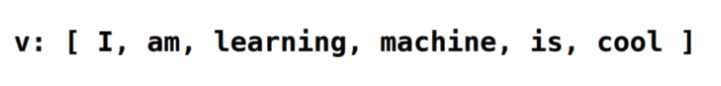

The simplist way to convert into numeric to is define a matrix like this. Here Unigram means we consider each word separately. For reference, Bigram means we could consider two words combined together and extract feature
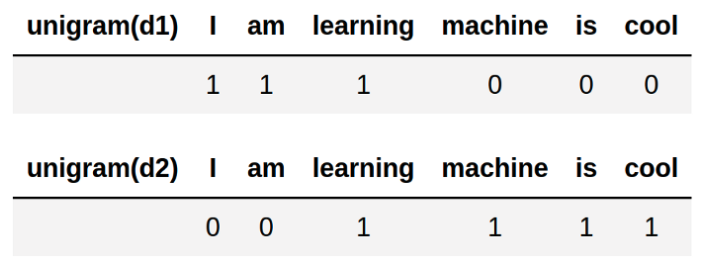

This is called **text vectorization**

In [35]:
# for text vectorization, we need a string for each comment, not a list of words
# google: convert a list to string:
X = [' '.join(comment) for comment in cleaned_x]
X

['! ! ! rt woman complain cleaning house . & man always take trash ...',
 '! ! ! rt boy dat cold ... tyga dwn bad cuffin dat hoe 1st place ! !',
 '! ! ! rt dawg ! ! ! rt ever fuck bitch start cry ? confused shit',
 '! ! ! rt look like tranny',
 '! ! ! rt shit hear might true might faker bitch told ya \ue011',
 '! ! ! " shit blow .. claim faithful somebody still fucking hoe ! 😂 😂 😂 "',
 '! ! ! " sit hate another bitch .. got much shit going ! "',
 "! ! ! “ cause i'm tired big bitch coming u skinny girl ! ! ”",
 '" & might get ya bitch back & thats "',
 '" : hobby include : fighting mariam " bitch',
 '" keeks bitch curve everyone " lol walked conversation like . smh',
 '" murda gang bitch gang land "',
 '" hoe smoke loser ? " yea ... go ig',
 '" bad bitch thing like "',
 '" bitch get "',
 '" bitch nigga miss "',
 '" bitch plz whatever "',
 '" bitch love "',
 '" bitch get cut everyday b "',
 '" black bottle & bad bitch "',
 '" broke bitch cant tell nothing "',
 '" cancel bitch like nino "

In [41]:
### Split the sample into Train and Testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=824)
len(X_train)

17348

In [37]:
#text vectorization

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape 


(17348, 15404)

### Step 2 and 3 Train and Test the model

In [207]:
## another way of text vectorization

# from sklearn.feature_extraction.text import TfidfTransformer
# tfidf_transformer = TfidfTransformer()
# X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
# X_train_tfidf.shape

In [38]:
# model building

from sklearn.naive_bayes import MultinomialNB
NB_model = MultinomialNB()
NB_clf = NB_model.fit(X_train_counts, y_train)

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=6)
rf_clf = rf_model.fit(X_train_counts, y_train) 

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_clf=log_model.fit(X_train_counts, y_train)


In [39]:
X_test_counts = count_vect.transform(X_test)

rf_predicted = rf_clf.predict(X_test_counts)
NB_predicted = NB_clf.predict(X_test_counts)
log_predicted = log_clf.predict(X_test_counts)

In [40]:
import numpy as np
print("Random Forest Accuracy: ", np.mean(rf_predicted == y_test))

print("Naive Bayes Accuracy: ", np.mean(NB_predicted == y_test))

print("Logistic Regression Accuracy: ", np.mean(log_predicted == y_test))

Random Forest Accuracy:  0.7764626765299261
Naive Bayes Accuracy:  0.8836583725622058
Logistic Regression Accuracy:  0.8971082716879624


## 彩蛋

从网页里抓取表格数据是如此的简单！

In [92]:
test = pd.read_html("https://en.wikipedia.org/wiki/Academy_Award_for_Best_Actor")
test[4]

,Year,Actor,Role(s),Film,Ref.
0,1940 (13th),James Stewart,"Macaulay ""Mike"" Connor",The Philadelphia Story,[21]
1,1940 (13th),Charlie Chaplin,"Adenoid Hynkel and ""The Barber""",The Great Dictator,[21]
2,1940 (13th),Henry Fonda,Tom Joad,The Grapes of Wrath,[21]
3,1940 (13th),Raymond Massey,Abraham Lincoln,Abe Lincoln in Illinois,[21]
4,1940 (13th),Laurence Olivier,"Maximilian ""Maxim"" de Winter",Rebecca,[21]
5,1941 (14th),Gary Cooper,Sgt. Alvin York,Sergeant York,[22]
6,1941 (14th),Cary Grant,Roger Adams,Penny Serenade,[22]
7,1941 (14th),Walter Huston,Mr. Scratch,The Devil and Daniel Webster,[22]
8,1941 (14th),Robert Montgomery,Joe Pendleton,Here Comes Mr. Jordan,[22]
9,1941 (14th),Orson Welles,Charles Foster Kane,Citizen Kane,[22]


# Summary - Natural Language Processing

## Python Regular Expression (RegEx)
- re package offers a set of functions that allows us to search a string for a match:
    - sub Replaces one or many matches with a string
- The following website helps us to define a "pattern" https://www.w3schools.com/python/python_regex.asp
    - [] search for a set of characters, for example, [a-z]: single small letter
    - + to indicate multiple such pattern
    - \s search for "space"
    - \S search for "non-space"
        
## NLTK package
- Tokenizing: nltk.word_tokenize
    - for social media: 
        - from nltk.tokenize import TweetTokenizer
- Remove punctuation marks (not recommended for social media text)
    - isalpha( ) isnumeric string method to see if each word is made of letters or numbers
- Removing stopwords: from nltk.corpus import stopwords
- Stemming and Lemmatizing
    - from nltk.stem import PorterStemmer
    - from nltk.stem import WordNetLemmatizer

## Sentiment Analysis Using Sci-kit Learn package
- convert text into numeric: bag of words
- good reference: https://towardsdatascience.com/building-a-sentiment-classifier-using-scikit-learn-54c8e7c5d2f0


